# NumPy Exercises

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/Asterics2020-Obelics](https://github.com/Asterics2020-Obelics/School2019/tree/master/numpy)

**Warning**: This notebook contains all the solutions. If you are currently sitting in the `NumPy` lecture, close this immediately ;-) You will now work in blank notebook, you don't need anything else!

In [1]:
import numpy as np
import numba as nb
import numexpr as ne
import sys

print("Python version:  {0}\n"
      "NumPy version:   {1}\n"
      "numba version:   {2}\n"
      "numexpr version: {3}"
      .format(sys.version, np.__version__, nb.__version__, ne.__version__))

Python version:  3.7.2 (default, Jan 10 2019, 10:02:28) 
[GCC 8.2.1 20181127]
NumPy version:   1.16.2
numba version:   0.43.1
numexpr version: 2.6.9


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 5)
plt.rcParams['figure.dpi'] = 300

## Exercise 1: Extract the integer part of a random sample

    np.random.uniform(0, 10, 10)
    
e.g. `[23.5, 42.0, 500.3, 123.9] -> [23, 42, 500, 123]`

### Solution:

In [3]:
a = np.array([23.5, 42.0, 500.3, 123.9])
a

array([ 23.5,  42. , 500.3, 123.9])

In [4]:
a - a%1

array([ 23.,  42., 500., 123.])

In [5]:
np.floor(a)

array([ 23.,  42., 500., 123.])

In [6]:
np.ceil(a) - 1

array([ 23.,  41., 500., 123.])

In [7]:
np.trunc(a)

array([ 23.,  42., 500., 123.])

In [8]:
a.astype(int)

array([ 23,  42, 500, 123])

### Further discussions

In [9]:
a = np.random.uniform(0, 10, 10000)

In [10]:
%timeit a - a%1

83 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit np.floor(a)

22.3 µs ± 258 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit np.ceil(a) - 1

26.3 µs ± 163 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
%timeit np.trunc(a)

22.1 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%timeit a.astype(int)  # the winner -> casting

5.12 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Exercise 2: Create a 5x5 matrix with 5's on its diagonal

```5 0 0 0 0
0 5 0 0 0
0 0 5 0 0
0 0 0 5 0
0 0 0 0 5
```

### Solution: `np.eye()`

In [15]:
np.eye(5) * 5

array([[5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5.]])

### Alternative solutions and further discussions

In [16]:
%%timeit
a = np.eye(1000) * 5

643 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%%timeit
a = np.eye(1000)
np.multiply(a, 5, out=a)  # avoid creating a copy 

638 µs ± 5.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%%timeit
a = np.zeros((1000, 1000))
a[np.diag_indices_from(a)] = 5

319 µs ± 3.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%timeit np.diag(np.full(1000, 5))

1.45 ms ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [1]:
%timeit np.diag(np.ones(1000) * 5)

1.59 ms ± 94.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Numba?

In [20]:
@nb.njit
def diag_nb(n, value):
    return np.diag(np.ones(n) * value)

In [21]:
%timeit diag_nb(1000, 5)

203 µs ± 24.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
@nb.njit
def diag2_nb(n, value):
    mat = np.zeros((n, n))
    for i in range(n):
        mat[i,i] = value
    return mat

In [23]:
%timeit diag2_nb(1000, 5)

187 µs ± 557 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Exercise 3: Calculate `c`, with:

    a = np.random.random(1234567)
    b = np.random.random(1234567)
  
so that

$$
c_i = \tan(a_i) \cdot b_i - a_i^{b_i}
$$

for $i \in [0, 1234566]$

In [24]:
a = np.random.random(1234567)
b = np.random.random(1234567)

### Solution:

In [25]:
def f(a, b):
    return np.tan(a) * b - a**b

In [26]:
%timeit f(a, b)

86 ms ± 330 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%timeit ne.evaluate("tan(a)*b - a**b")

15.6 ms ± 73.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### What about a Python loop?

In [28]:
def tanabab(a, b):
    c = np.empty_like(a)
    for i in range(len(a)):
        c[i] = np.tan(a[i]) * b[i] - np.power(a[i], b[i])
    return c

In [29]:
%timeit tanabab(a, b)

4.41 s ± 9.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Let's JIT it with `numba`!

In [30]:
@nb.jit
def tanabab_nb(a, b):
    c = np.empty_like(a)
    for i in range(len(a)):
        c[i] = np.tan(a[i]) * b[i] - np.power(a[i], b[i])
    return c

In [31]:
%time tanabab_nb(a, b)  # first execution includes the compilation!

CPU times: user 152 ms, sys: 0 ns, total: 152 ms
Wall time: 151 ms


array([-0.94270566, -0.33383609, -0.12688391, ..., -0.11912278,
       -0.66113313, -0.02243653])

In [32]:
%timeit tanabab_nb(a, b)  # the second is pure LLVM optimised code

82.4 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
@nb.jit
def tanabab_nb_mutating_a(a, b):
    for i in range(len(a)):
        a[i] = np.tan(a[i]) * b[i] - np.power(a[i], b[i])

In [34]:
%time tanabab_nb_mutating_a(a, b);  # first execution includes the compilation!

CPU times: user 138 ms, sys: 0 ns, total: 138 ms
Wall time: 137 ms


In [35]:
%timeit tanabab_nb_mutating_a(a, b);  # the second is pure LLVM optimised code

13.2 ms ± 73.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Summary (your mileage may vary):
- **~4500ms** (Python)
- **~150ms** (numba, inc. JIT comp.)
- **~90ms** (numpy)
- **~80ms** (numba, JIT)
- **~140ms** (reusing `a`, numba, inc. JIT comp.)
- **-15ms** (numexpr)
- **~13ms** (reusing `a`, numba, JIT)

## Exercise 4: Given two arrays `a` anb `b`, check if they are equal

    a = np.random.random(1234567)
    b = a.copy()

    b[-1] = 23  # artificially make them differ at the very end ;)

In [14]:
a = np.random.random(1234567)
b = a.copy()

b[-1] = 23  # artificially make them differ at the very end ;)

### Solution:

In [15]:
%timeit np.allclose(a, b)

15 ms ± 969 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Using numba?

In [18]:
@nb.jit
def allclose(a, b, tol=0.0001):
    for i in range(len(a)):
        if np.isclose(a[i], b[i]):
            return False 
    return True

In [22]:
%timeit np.count_nonzero(a == b) == a.size

1.48 ms ± 46.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Exercise 5: Create the following matrix

    1 2 3 4 5 6
    1 2 3 4 5 6
    1 2 3 4 5 6
    1 2 3 4 5 6
    1 2 3 4 5 6


### Solution:

In [40]:
np.ones((5, 6)) * np.arange(1, 7)

array([[1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.]])

In [41]:
np.ones(5)[:, np.newaxis] * np.arange(1, 7)

array([[1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.]])

### Alternative solutions and further discussions

In [42]:
%timeit np.ones((500, 6)) * np.arange(1, 7)

7.78 µs ± 49.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [43]:
%%timeit
a = np.ones((500, 6))
np.multiply(a, np.arange(1, 7), out=a)

7.82 µs ± 41.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
%timeit np.ones(500)[:, np.newaxis] * np.arange(1, 7)

11 µs ± 168 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [45]:
%%timeit
a = np.empty((500, 6))
a[:] = np.arange(1, 7)

4.48 µs ± 25.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [46]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [47]:
np.ones(5)[:, np.newaxis]  # adds a new dimension

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [48]:
np.ones(5)[:, np.newaxis].shape

(5, 1)

In [49]:
np.arange(1, 7).shape

(6,)

In [50]:
# broadcasting will turn (5, 1) and (6,) into (5, 6)
(np.ones(5)[:, np.newaxis] * np.arange(1, 7)).shape

(5, 6)

### Numba?

In [51]:
@nb.njit
def grad_nb(n, m):
    mat = np.empty((n, m))
    for i in range(m):
        for j in range(n):
            mat[j,i] = i + 1
    return mat

In [52]:
%timeit grad_nb(500, 6)

1.48 µs ± 4.65 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [53]:
int_type = np.int32

@nb.njit
def grad_int_nb(n, m):
    mat = np.empty((n, m), dtype=int_type)
    for i in range(1, m):
        for j in range(n):
            mat[j,i] = i + 1
    return mat

In [54]:
%timeit grad_int_nb(500, 6)

1.2 µs ± 6.42 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Exercise 6: Roll two 6-sided dice 100 times and count each individual value

### Solution:

This is an ugly, hardcoded solution:

In [55]:
def roll_dice(n):
    dice_1 = np.random.randint(1, 6, n)
    dice_2 = np.random.randint(1, 6, n)
    sums = dice_1 + dice_2
    return np.unique(sums, return_counts=True)

In [56]:
roll_dice(100)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 5, 16, 17,  9, 20, 16,  7,  5,  5]))

## Exercise 7: Roll five 12-sided dice 123456 times and count each individual value

If you did it right, you now only need to change 2 parameters of your previous code ;)

If not, write an appropriate function.

Create a histogram of the values!

### Solution:

In [88]:
def roll_dice(n_rolls, n_sides, n_die):
    rolls = np.sum(np.random.randint(1, n_sides+1, n_rolls*n_die)
                   .reshape(n_die, n_rolls), axis=0)
    return np.unique(rolls, return_counts=True)

In [58]:
rolls = roll_dice(123456, 12, 5)

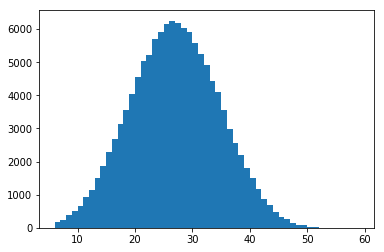

In [59]:
plt.hist(range(len(rolls[1])), bins=rolls[0], weights=rolls[1]);

## Exercise 8: Find the value closest to a given number in an array

    a = np.random.random(10)
    target = 0.23

### Solution:

In [60]:
a = np.random.random(10)
target = 0.23
a

array([0.26358331, 0.33009962, 0.63997572, 0.7363389 , 0.94178998,
       0.97565765, 0.44872178, 0.73721454, 0.49252081, 0.61039262])

In [61]:
a[np.argmin(np.abs(a - target))]

0.263583309383533

### Numba?

In [62]:
a = np.random.random(1000)

In [63]:
%timeit a[np.argmin(np.abs(a - target))]

4.21 µs ± 28.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [64]:
@nb.jit
def find_closest(arr, target):
    idx = 0
    delta = np.nan
    for i in range(len(arr)):
        _delta = abs(arr[i] - target)
        if _delta < delta:
            delta = _delta
            idx = i
    return arr[idx]

In [65]:
%timeit find_closest(a, 0.23)

1.3 µs ± 2.84 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Exercise 9: Create a random array with 10 elements and replace its largest value with 0

## Bonus: Replace the second largest value with 0

### Solution:

In [66]:
a = np.random.randint(0, 100, 10)
a

array([76, 33, 91, 31,  1, 89, 14,  5, 99, 77])

In [67]:
np.argmax(a)  # gives the index of the maximum
a[np.argmax(a)] = 0
a

array([76, 33, 91, 31,  1, 89, 14,  5,  0, 77])

### Solution for the bonus:

In [68]:
a = np.random.randint(0, 100, 10)
a

array([ 3, 97, 80, 84, 25, 22, 14, 25, 34, 89])

In [69]:
idx = np.argpartition(a, -2)[-2:]
a[idx[np.argsort(a[idx])][0]] = 0

In [70]:
a

array([ 3, 97, 80, 84, 25, 22, 14, 25, 34,  0])

### Numba?

In [71]:
a = np.random.random(10000000)

In [72]:
%timeit a[np.argmax(a)] = 0

6.01 ms ± 61.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [73]:
@nb.njit
def zero_largest(arr):
    idx = 0
    largest = arr[0]
    for i in range(len(arr)):
        if arr[i] > largest:
            largest = arr[i]
            idx = i
    arr[idx] = 0.0

In [74]:
%timeit zero_largest(a)

10.2 ms ± 93.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Using numba to solve the bonus exercise

In [75]:
a = np.random.random(10000000)

In [76]:
%%timeit 
idx = np.argpartition(a, -2)[-2:]
a[idx[np.argsort(a[idx])][0]] = 0

91.1 ms ± 4.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [77]:
@nb.njit
def zero_second_largest(arr):
    idx_largest = 0
    idx_second_largest = 0
    largest = arr[0]
    second_largest = 0
    for i in range(len(arr)):
        if arr[i] > largest:
            second_largest, largest = largest, arr[i]
            idx_second_largest, idx_largest = idx_largest, i
    arr[idx_second_largest] = 0

In [78]:
%timeit zero_second_largest(a)

11.7 ms ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Exercise 10: Create a checkerboard (8x8, 0s and 1s)

    0 1 0 1 0 1 0 1
    1 0 1 0 1 0 1 0
    0 1 0 1 0 1 0 1
    1 0 1 0 1 0 1 0
    0 1 0 1 0 1 0 1
    1 0 1 0 1 0 1 0
    0 1 0 1 0 1 0 1
    1 0 1 0 1 0 1 0

### Solution:

In [79]:
checkerboard = np.zeros((8, 8), dtype='i')
checkerboard[::2, 1::2] = 1
checkerboard[1::2, ::2] = 1
checkerboard

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]], dtype=int32)

###  Numba?

In [80]:
%%timeit
checkerboard = np.zeros((8, 8), dtype='i')
checkerboard[::2, 1::2] = 1
checkerboard[1::2, ::2] = 1
checkerboard

1.49 µs ± 8.68 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [81]:
@nb.njit
def checkerboard(n):
    board = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            k = i + j*2
            while k >= n:
                k = k - n
            board[k,i] = 1
            
    return board

In [82]:
%timeit checkerboard(8)

486 ns ± 4.74 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Exercise 11: Calculate the diagonal of a dot product

In [83]:
A = np.random.random((5, 5))
B = np.random.random((5, 5))

### Solution:

In [84]:
%timeit np.diag(np.dot(A, B))

2.4 µs ± 30 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [85]:
%timeit np.sum(A * B.T, axis=1)

5.09 µs ± 25.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [86]:
%timeit np.einsum("ij,ji->i", A, B)

1.32 µs ± 5.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Acknowledgements
![](images/eu_asterics.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).